#  Integrated Project 1

## goal of the project ##
in this project we will studdy the dataset we get from the game company and we will try to find a pattern that will give us the next big games in the market that we could put in money and advertisments for them.
our first step will be to download the data, check it and propering it for analyzing. 
the next steps will be analyzing and visualing the data and draw first conclusions.
then we will check hypothesis and get closer to getting to our conclusion

# step 1 - opening and studding the data

In [4]:
! pip install sidetable

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sidetable
import matplotlib as mpl
from scipy import stats as st

we imported the libraries we need to work with

In [9]:
try:
    data = pd.read_csv("/datasets/games.csv")
except:
    data = pd.read_csv('C:/Users/solon/OneDrive/שולחן העבודה/מרדכי/practum100/games.csv')

we called our dataset in to our notebook

In [10]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [12]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7507,God of War Collection,PSV,2014.0,Action,0.08,0.06,0.01,0.05,73.0,7.4,M
4679,Mobile Suit Gundam,SAT,1995.0,Action,0.00,0.00,0.41,0.00,NaN,NaN,NaN
7081,Pocket Fighter,PS,1997.0,Fighting,0.06,0.04,0.12,0.01,NaN,NaN,NaN
14502,Lock On: Modern Air Combat,PC,2003.0,Simulation,0.00,0.03,0.00,0.01,76.0,7.5,E
12480,Speed,Wii,2010.0,Racing,0.04,0.02,0.00,0.01,NaN,tbd,E
4215,Destroy All Humans!,XB,2005.0,Shooter,0.34,0.11,0.00,0.02,NaN,NaN,NaN
8861,Space Invaders Extreme,DS,2008.0,Shooter,0.12,0.01,0.01,0.01,85.0,7.6,E
15222,RedCard 20-03,GC,2002.0,Sports,0.02,0.00,0.00,0.00,71.0,7.4,E
11449,Murder in Venice,DS,2011.0,Adventure,0.05,0.02,0.00,0.01,NaN,tbd,E10+
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,M


the head of data could look good and in the rest we have diffrent issues so we look also at the tailand random samples just to have a better clue on our data

looking at the first time at the data. we allready see we have Nan's and 0  to deal with

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


from looking at the info we see there are 16715 rows but in the columns there are missing rows, column names have capital and small letters that we should lower. the user score column is an object where it is numbers so we need to change it to float

In [14]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [15]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [16]:
data.isnull().sum()/ data.shape[0] * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

we chcked how mouch nan's we have and what precentage of the data it is. from what we see 3 columns have a critical Nan problen since it's over 40% but all the rest is pretty low.

In [17]:
data.duplicated().sum()

0

no duplicated rows

# step 2- Preparing the data 

after reading the data we will start prepare the data for analyzes.
first we will lower the columns names
then we will change data types
and then we will deal with nan's

In [18]:
data.columns = [x.lower() for x in data.columns]

In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


we began are work to fix the data with lowering the names of the columns

In [20]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype(int)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


we changed the type in years of release to int insted float because a year is a number but a hole number and it will be easier to calculate and use it. we take in mind that it is a tear but we dont see it as a date

In [22]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,1974.193599,0.263377,0.145060,0.077617,0.047342,68.967679
std,252.559930,0.813604,0.503339,0.308853,0.186731,13.938165
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


we can learn about are numerical data. we see for each column the min and max and statistical info like mean and std

In [23]:
data.describe(include=['object'])

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


now we are looking at the 'object' type statistical information. here is something weird that the user score is an object insted of number and that is because in the column we have 2424 rows with 'tbd' that is not a number. we can hypothes that this newer games that are not updated for there score so let us check it

In [24]:
data[data.user_score=='tbd']['year_of_release'].value_counts()

2009    405
2010    331
2008    326
2011    217
2007    192
2002    192
2006    124
2005    121
2004    107
2003     95
2001     82
0        48
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: int64

our hypothesis is wrong, the distribution of the 'tbd' is all over years in the table and not only new games so we cant just fill it with year

now lets try to change the 'user_score' to type float and deal with the 'tbd'

In [25]:
data['user_score']=data['user_score'].replace('tbd', np.nan)
data['user_score']=data['user_score'].astype(float)
data['user_score']=data['user_score']*10

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


and we did change the type to float. the 'tbd' dosent mean any thing and we didnt whant to delete all thos rows so we replaced the string to nan's and changed the type to float. it is allmost the same meanning if it is a nan or tbd that means we dont know what it is

In [27]:
data.stb.missing(style=True)

,missing,total,percent
user_score,"9,125","16,715",54.59%
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


we can see our missing data by column and learn what precentage of the data is missing. we see that the most critical columns are critic_score, raiting and user_score. now we need to decide what to do with the missing values and how to do it 

In [28]:
data[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


we see that in columns genre and name we have 2 nan's and there symetrical so we will drop them

In [29]:
data.dropna(subset=['name', 'genre'], inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [31]:
data['name'].isnull().sum()

0

from understanding our data i decide not to touch the nan's becuase there are so mouch of them and there is no logical that we know of or an mean we can give it so we will leave it as it is and if we see in future that it bothers us we will localy take it out of our dataset. i had a thaught to build a function for 'year_of_release' column that will take the year from the name of the game but from looking at the names we wee there are years with 4 digets and years with 2 digets and maybe the 2 digets are version and not year so we can't really rely on it

now we are adding a column of total sales from all regions

In [32]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [33]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


after adding column we check what type it is and if it is correct. that seems fine that the total sales is float

# step 3- analyzing the data

now we preprepaired our data and we cleand and sorted our table we will start analyzing our data.
first we will start with leranning what games where best salers by year
second we will check the most popular platform
then we will decide our period of time for the best analyze and make a more specific table for our studdy and learn disribution of succes for every region

to start making our graph we will make a new dataframe that will count the number of games from every year in the list

In [35]:
fdf = data[['year_of_release', 'name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
fdf

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


we have a 0 year that dosent make sensse so we filter it out

In [36]:
fdf=fdf[fdf['year_of_release']!=0]
fdf

,year_of_release,name
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15
10,1989,17


now lets make a graph that shows us visualy how many games were released every year that we can understand and use this data

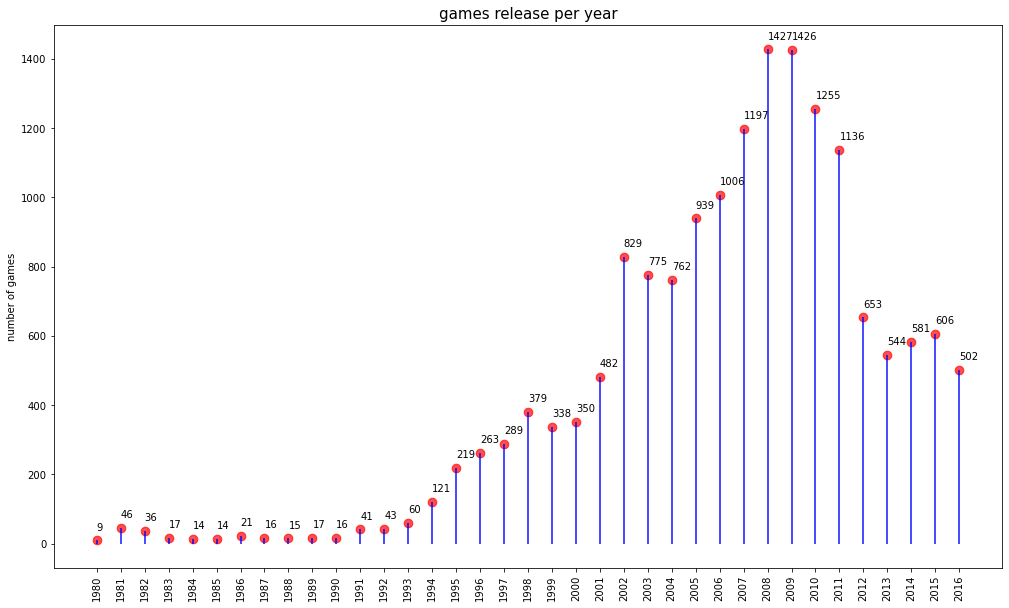

In [37]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=fdf.year_of_release, ymin=0, ymax=fdf.name, color='blue', alpha=0.7, linewidth=2)
ax.scatter(x=fdf.year_of_release, y=fdf.name, s=75, color='red', alpha=0.7)

ax.set_title("games release per year", fontdict={'size':15})
ax.set_ylabel('number of games')
ax.set_xticks(fdf.year_of_release)
ax.set_xticklabels(fdf.year_of_release, rotation=90)

for row in fdf.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name,2))



we see that as technology and gameing goes a head there is more games a year and that is predicted. from 1980 to 1994 we have only a few games a year and then we see it grow from 1994 to 2011 and even gets 10 tmes more. the pik is in 2011 and then is sudenly drops in half. that is an intresting finding that we need to think why it happend

now let start looking in to games and sales sorted by platforms

In [38]:
pdf=data.pivot_table(index='platform', values='total_sales', aggfunc=('sum','count','mean')).sort_values(by='sum', ascending=False)
pdf

,count,mean,sum
platform,,,
PS2,2161,0.581106,1255.77
X360,1262,0.769746,971.42
PS3,1331,0.705973,939.65
Wii,1320,0.687508,907.51
DS,2151,0.374765,806.12
PS,1197,0.610576,730.86
GBA,822,0.386679,317.85
PS4,392,0.801378,314.14
PSP,1209,0.243218,294.05


In [39]:
bsp=data[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
bsp

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


this table shows us the sum of total sales for each platform. now we will add a column of the z sales that means what is the distance of the sales from the mean of the total sales. this will help us see the distribution for all platforms.

In [40]:
bsp['sales_z']= (bsp['total_sales']-bsp['total_sales'].mean())/bsp['total_sales'].std()
bsp

,platform,total_sales,sales_z
0,PCFX,0.03,-0.825614
1,GG,0.04,-0.825586
2,3DO,0.10,-0.825413
3,TG16,0.16,-0.825241
4,WS,1.42,-0.821623
5,NG,1.44,-0.821565
6,SCD,1.86,-0.820359
7,DC,15.95,-0.779896
8,GEN,28.35,-0.744287
9,SAT,33.59,-0.729239


we can see that most of platforms are around the the mean and the best salers are a lot over the mean. it reallyjumps there.

for makinf this information visual we will determine if the z is positive or negetive when positive is green and negetive is red

In [41]:
bsp['z_positive']=['red' if x<0 else 'green' for x in bsp['sales_z']]
bsp

,platform,total_sales,sales_z,z_positive
0,PCFX,0.03,-0.825614,red
1,GG,0.04,-0.825586,red
2,3DO,0.10,-0.825413,red
3,TG16,0.16,-0.825241,red
4,WS,1.42,-0.821623,red
5,NG,1.44,-0.821565,red
6,SCD,1.86,-0.820359,red
7,DC,15.95,-0.779896,red
8,GEN,28.35,-0.744287,red
9,SAT,33.59,-0.729239,red


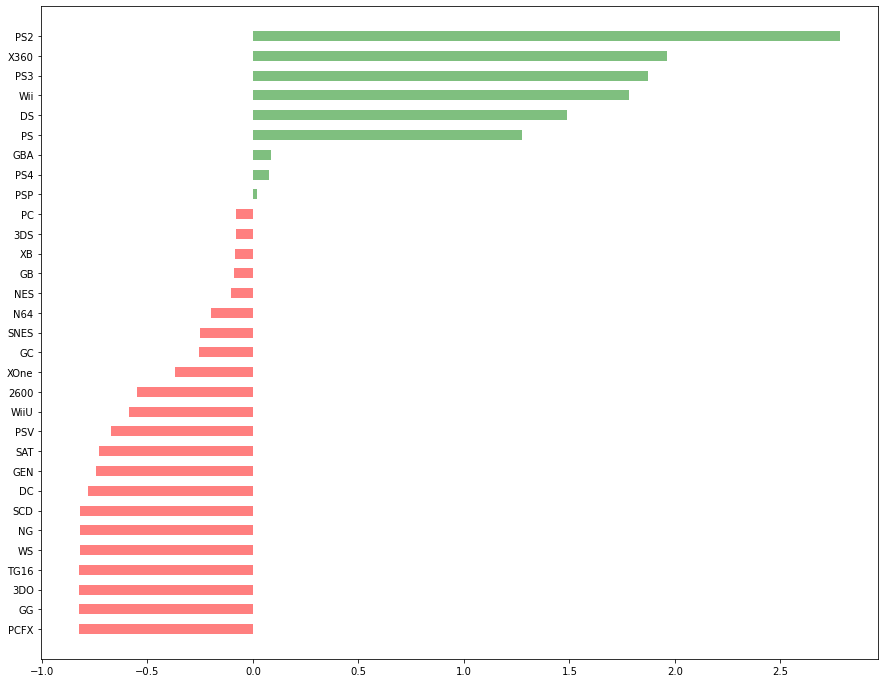

In [42]:
plt.figure(figsize=(15,12))
plt.hlines(y=bsp.platform, xmax=bsp.sales_z, xmin=0, color=bsp.z_positive, alpha=0.5, linewidth=10)
plt.show()

we see in a verry clear way what platform sales more and is the distribution and z are positive or negetive

the 5 best salers platforms are ps2, x360, ps3,wii and ds in overall income but was it always for this platforms? lets check them out by years and look for answers

## platform life time ## 

now we will check what is a platform life time by finding it's first year of sowing and last year of showing and more information that we might find

we start with building a graph that shows us the difrent platforms and when did they start and when do they end

In [43]:
plife=data[data.year_of_release >=1995]

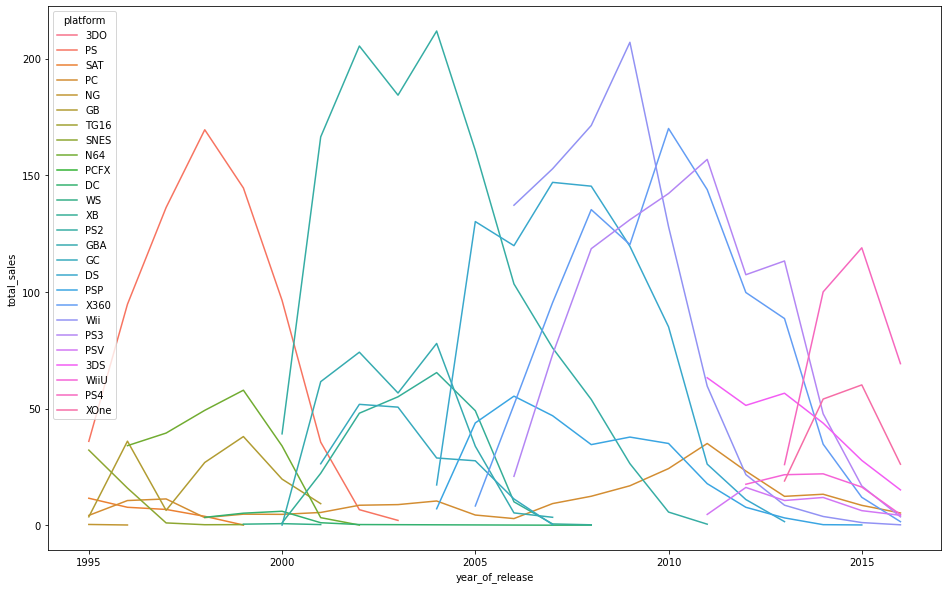

In [44]:
plife=plife.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(16,10))
ax= sns.lineplot(data=plife, x='year_of_release', y='total_sales', hue='platform')


we can learn from the graph that the older the platform is the more years it is in the market. maybe it is because there was less contest and the time it took technology to developwas slower so the same platforms where more time on market. platforms change and the best salers are not the longest life platforms. they appear and get high sales but in less the 10 years (and even less then 7) they dust away in the wind. the longest platform we see is the pc that has a pretty stable sale line but it dosent stop for over 20 years. 

now lets make the age studdy even more accurate

In [45]:
data=data.query('year_of_release !=0')
plife=data.groupby(['platform'])['year_of_release'].agg(['min', 'max']).reset_index()
plife['age']= plife['max']-plife['min']
plife

,platform,min,max,age
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0


In [46]:
plife.sort_values(by='age', ascending=False)

,platform,min,max,age
13,PC,1985,2016,31
4,DS,1985,2013,28
5,GB,1988,2001,13
28,X360,2005,2016,11
19,PSP,2004,2015,11
16,PS2,2000,2011,11
11,NES,1983,1994,11
3,DC,1998,2008,10
26,Wii,2006,2016,10
17,PS3,2006,2016,10


we can see on this table that the pc platform has 31 years and the best salers are about 10 year life time. the best pick of a platform life cycle is around the middle so we can see that there are 2 platforms that in 2016 are 5 years old (psv and 3ds) and 1 is 4 years old(wiiu) so we sould consider that next years thy will have up going sales. but lets be carfully because the total sale graph shows that is is starting to fall and we mantioned that the newer platforms have a shorter life time.on the other side our data is up to 2016 so maybe its still growing and we dont have lsat year data updated

we will choose 2005 as the dataframe to work with since we  saw that a life cycle is 10 years so lets go back 10 years and we saw that in 2005 we are reaching the 1000 games released a year that is a new era for games. 

for more relevant data let make the data frame closer to now so we will take 3 years back to 2012 since 2016 info is not fully updated

In [47]:
new_platform=['X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU', 'XOne','PS4']
fd=data[data['year_of_release']>=2012]
fd=data[data['platform'].isin(new_platform)]
fd.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16707,Aiyoku no Eustia,PSV,2014,Misc,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.0,0.01,0.00,0.0,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01


now we have a filtered table fo acurated years and we will find if platforms are growing or shrinking

In [48]:
fds=pd.pivot_table(fd, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum',fill_value=0)
fds

platform,3DS,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,
2005,0.00,0.00,0.00,0.00,0.00,0.00,8.25,0.00
2006,0.00,20.96,0.00,0.00,137.15,0.00,51.62,0.00
2007,0.00,73.19,0.00,0.00,152.77,0.00,95.41,0.00
2008,0.00,118.52,0.00,0.00,171.32,0.00,135.26,0.00
2009,0.00,130.93,0.00,0.00,206.97,0.00,120.29,0.00
2010,0.00,142.17,0.00,0.00,127.95,0.00,170.03,0.00
2011,63.20,156.78,0.00,4.63,59.65,0.00,143.84,0.00
2012,51.36,107.36,0.00,16.19,21.71,17.56,99.74,0.00
2013,56.57,113.25,25.99,10.59,8.59,21.65,88.58,18.96


In [49]:
growing=(fds-fds.shift(+1)).T
growing

year_of_release,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,
3DS,NaN,0.00,0.00,0.00,0.00,0.00,63.20,-11.84,5.21,-12.81,-15.98,-12.64
PS3,NaN,20.96,52.23,45.33,12.41,11.24,14.61,-49.42,5.89,-65.49,-30.94,-13.22
PS4,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.99,74.01,18.90,-49.65
PSV,NaN,0.00,0.00,0.00,0.00,0.00,4.63,11.56,-5.60,1.31,-5.65,-2.00
Wii,NaN,137.15,15.62,18.55,35.65,-79.02,-68.30,-37.94,-13.12,-4.84,-2.61,-0.96
WiiU,NaN,0.00,0.00,0.00,0.00,0.00,0.00,17.56,4.09,0.38,-5.68,-11.75
X360,NaN,43.37,43.79,39.85,-14.97,49.74,-26.19,-44.10,-11.16,-53.84,-22.78,-10.44
XOne,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.96,35.11,6.07,-33.99


we made a table that shows us in every year for every platform if the sales were positive or negetive. the 0 shows thet there was no data so it or was'nt born or died allready. now let make it easyer for us and visiual the data

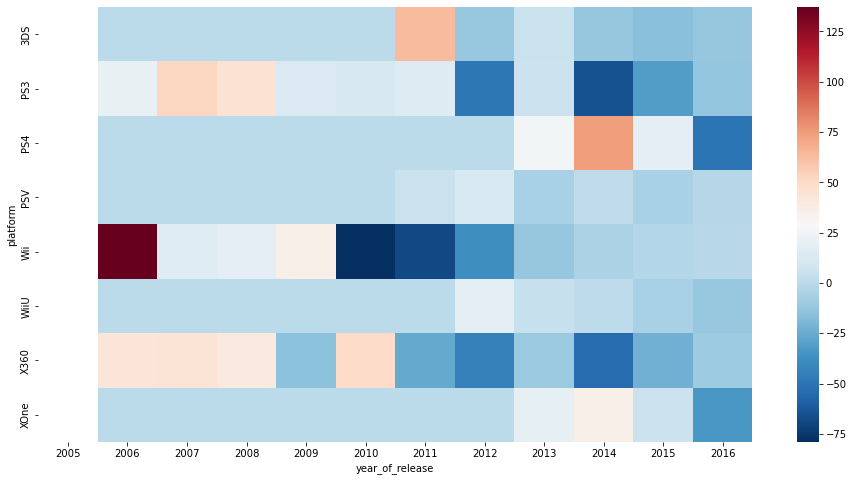

In [50]:
plt.figure(figsize=(16,8))
sns.heatmap(growing, cmap='RdBu_r')
plt.show()


from the look of it here it looks like most of the platforms are shrinking or fadeing accept from the x360 and ps3 that are growing.

to learn our studdy we will choose the 5 most promessing platforms to make our research on and they will be: x360, ps4,xone,wiiu and ps3 

##global game sales by platform## 

our next step in analyzing the data is to check the global sales of every game by the platform type so we will build a table of games, sales and platforms and we will studdy it for details

In [51]:
ggs=fd.groupby(['platform', 'name'])['total_sales'].sum().reset_index()
ggs

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
5544,XOne,XCOM 2,0.04
5545,XOne,ZombiU,0.01
5546,XOne,Zombie Army Trilogy,0.11
5547,XOne,Zoo Tycoon (2013),0.36


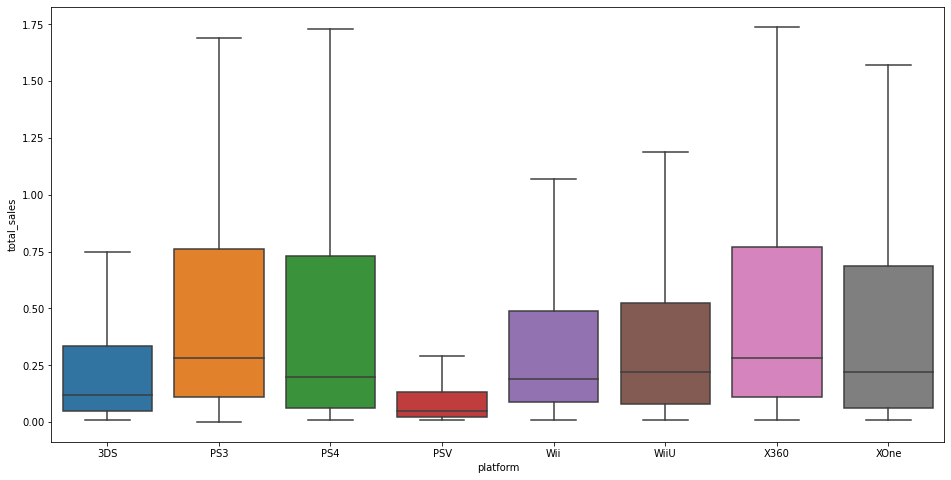

In [52]:
plt.figure(figsize=(16,8))
sns.boxplot(x='platform', y='total_sales', data=ggs, showfliers=False)
plt.show()

we made a box plot that shows the distribution of game sales per platform. we see that most of them have sales above the median line that shows that for evrey few games on a platform there are a few super salers. also we learn from this box plot that the avrage sales for the top platforms are just as mouch the same. what is unique is that every platform has a few games that are maybe exclusive or very populary so they are outliers that bring a lot of sales but the avrage is in the lower part of the box and it's about the same for all 

lets add a table column for the number of games for a platform

In [53]:
ggs.pivot_table(index='platform',values= 'total_sales', aggfunc=['count', 'sum'])

,count,sum
,total_sales,total_sales
platform,,
3DS,512,257.81
PS3,1305,931.34
PS4,392,314.14
PSV,429,53.81
Wii,1286,891.18
WiiU,147,82.19
X360,1231,961.24
XOne,247,159.32


we can see that platforms with a lot of games have a bigger total sale but it dosent mean that a game is a sale bomber but the sum of games makes a nice profit.

## review effects## 

now lets check how the user scoring and professional scoring effects on the sales. we will choose the x360 platform for our studdy

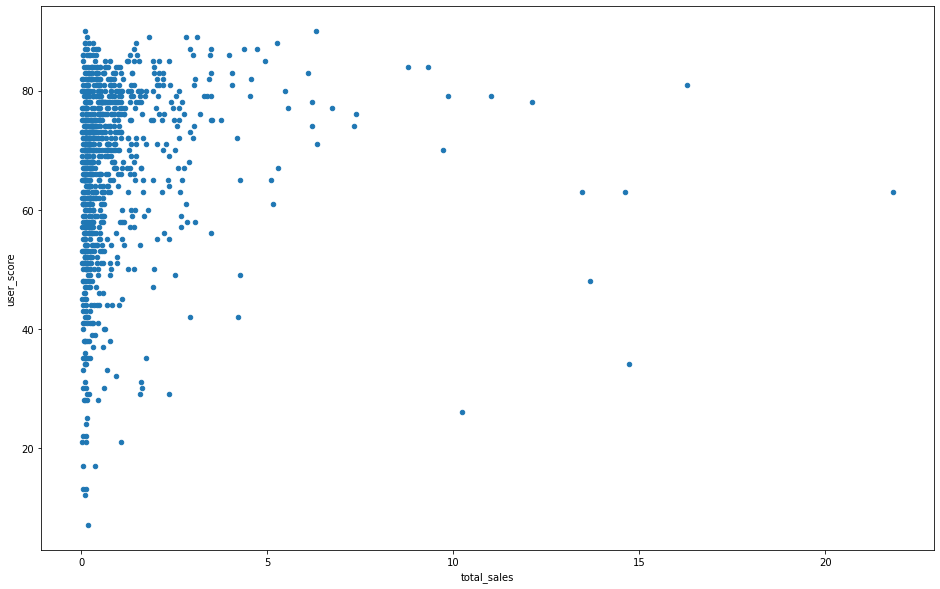

In [54]:
cde=fd[(fd.platform=='X360')&(fd['user_score'].notna())][['total_sales', 'user_score']]
cde.plot(x='total_sales', y='user_score', kind='scatter', figsize=(16,10))
plt.show()

In [55]:
cde.corr()

,total_sales,user_score
total_sales,1.000000,0.114187
user_score,0.114187,1.000000


we can see that there is not an effect directly between sales and the user score. even the outliers we see in the scatter are all over the sales and scoring and high scoring is not a big saler in this case. 

this was the user score, now lets check the critic score

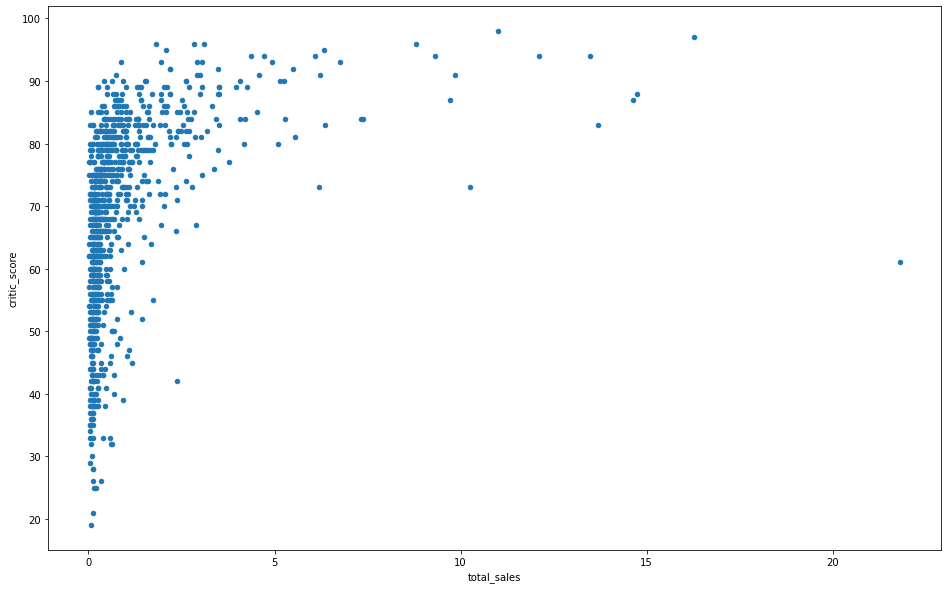

In [56]:
cde1=fd[(fd.platform=='X360')&(fd['critic_score'].notna())][['total_sales', 'critic_score']]
cde1.plot(x='total_sales', y='critic_score', kind='scatter', figsize=(16,10))
plt.show()

In [57]:
cde1.corr()

,total_sales,critic_score
total_sales,1.000000,0.392866
critic_score,0.392866,1.000000


the critics have more power in there scoring from ordinally users. the correlation here is three times as mouch fron users (0.39/0.11) but it is still very low and less then 0.6 is not a very big and connected ralations between the sales and scoring. we do see in the scatter that the more sales go to the higher scored games but not as an avrage sale but as a outlier. 

this was for the x360 platform, now lets check the other 4 best salers

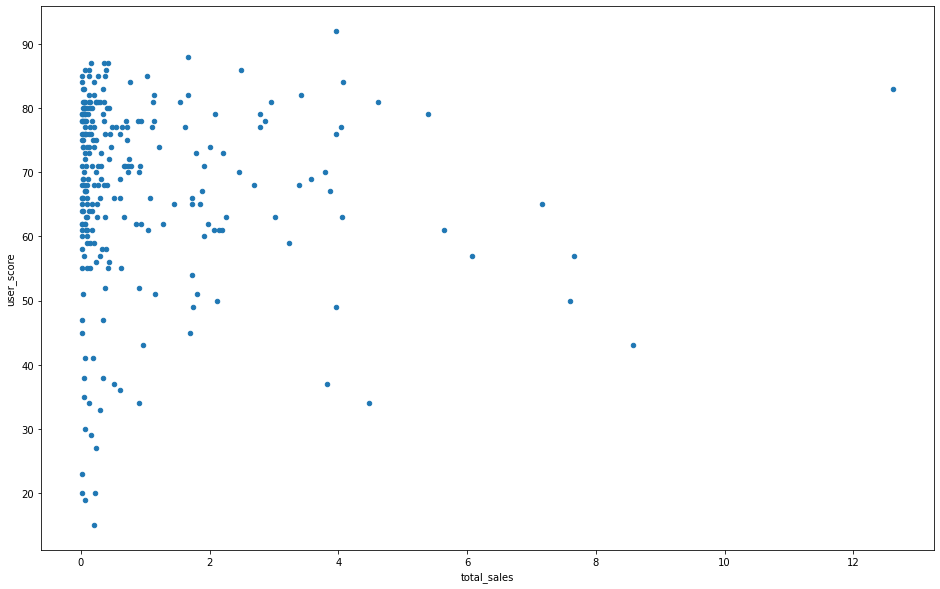

,total_sales,user_score
total_sales,1.000000,-0.031957
user_score,-0.031957,1.000000


In [58]:
cde2=fd[(fd.platform=='PS4')&(fd['user_score'].notna())][['total_sales', 'user_score']]
cde2.plot(x='total_sales', y='user_score', kind='scatter', figsize=(16,10))
plt.show()
cde2.corr()

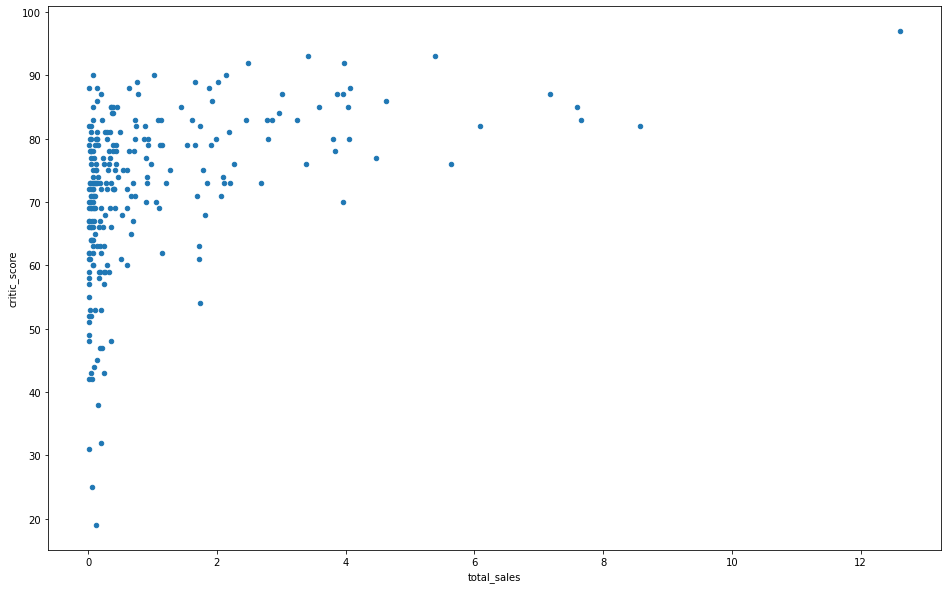

,total_sales,critic_score
total_sales,1.000000,0.406568
critic_score,0.406568,1.000000


In [59]:
cde3=fd[(fd.platform=='PS4')&(fd['critic_score'].notna())][['total_sales', 'critic_score']]
cde3.plot(x='total_sales', y='critic_score', kind='scatter', figsize=(16,10))
plt.show()
cde3.corr()

for the ps4 we see that the effect of scoring is the same as with the x360. the user score almost dosent effect at all and the critics are a lor more effective but there are all under 0.5 correlation

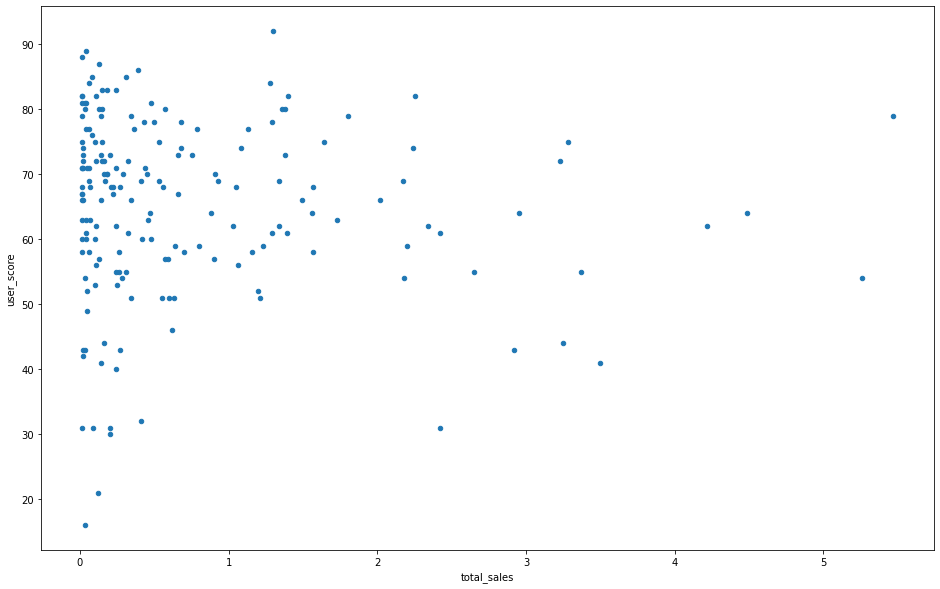

,total_sales,user_score
total_sales,1.000000,-0.068925
user_score,-0.068925,1.000000


In [60]:
cde4=fd[(fd.platform=='XOne')&(fd['user_score'].notna())][['total_sales', 'user_score']]
cde4.plot(x='total_sales', y='user_score', kind='scatter', figsize=(16,10))
plt.show()
cde4.corr()

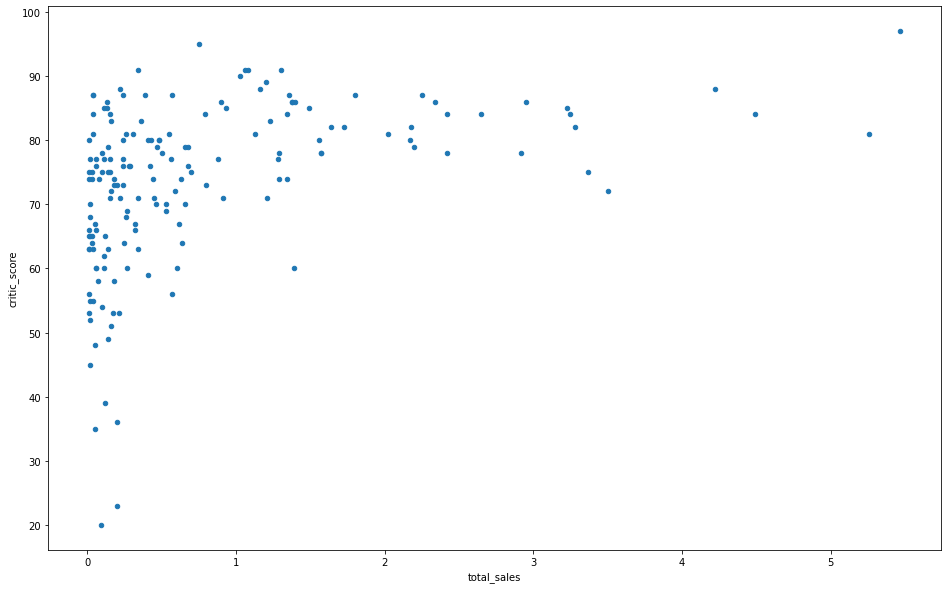

,total_sales,critic_score
total_sales,1.000000,0.416998
critic_score,0.416998,1.000000


In [61]:
cde5=fd[(fd.platform=='XOne')&(fd['critic_score'].notna())][['total_sales', 'critic_score']]
cde5.plot(x='total_sales', y='critic_score', kind='scatter', figsize=(16,10))
plt.show()
cde5.corr()

the xone distribution for user score shows that there is no effect and the criritc score shows that there is more sales for high scored games in distribution but in overall it is the same effect and corralation as other platforms

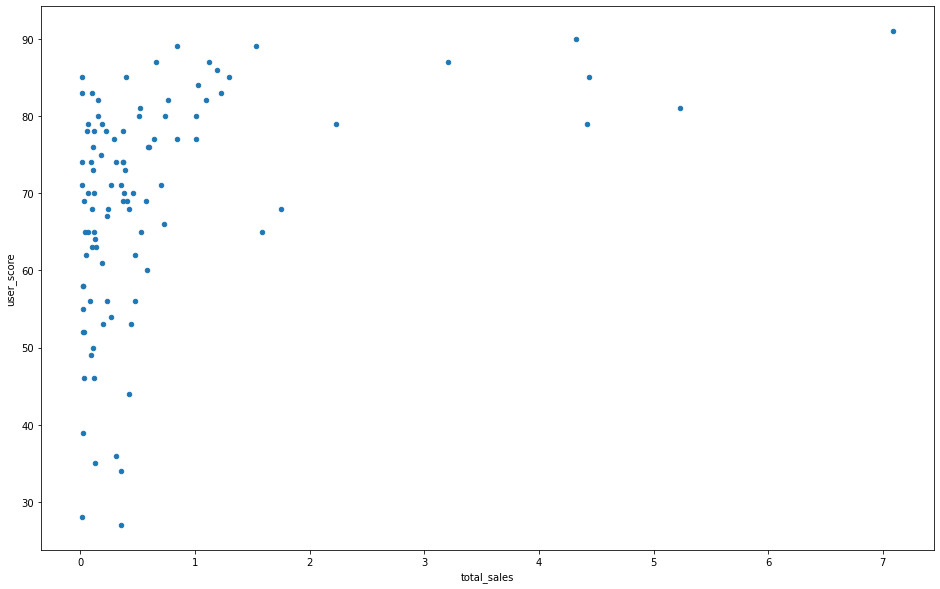

,total_sales,user_score
total_sales,1.000000,0.400219
user_score,0.400219,1.000000


In [62]:
cde6=fd[(fd.platform=='WiiU')&(fd['user_score'].notna())][['total_sales', 'user_score']]
cde6.plot(x='total_sales', y='user_score', kind='scatter', figsize=(16,10))
plt.show()
cde6.corr()

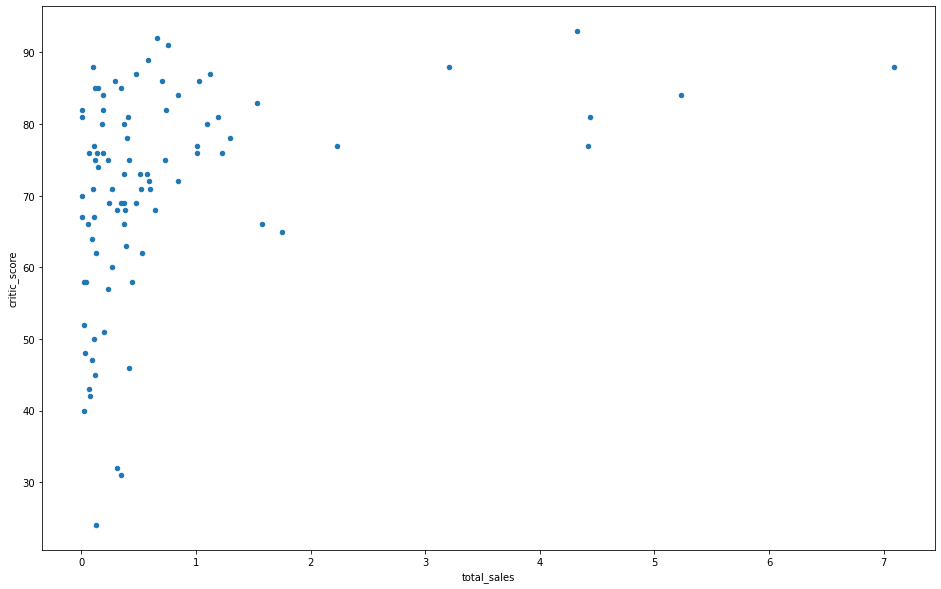

,total_sales,critic_score
total_sales,1.00000,0.34838
critic_score,0.34838,1.00000


In [63]:
cde7=fd[(fd.platform=='WiiU')&(fd['critic_score'].notna())][['total_sales', 'critic_score']]
cde7.plot(x='total_sales', y='critic_score', kind='scatter', figsize=(16,10))
plt.show()
cde7.corr()

intresting. for wiiu we still have a corralation under 0.5 but there is a very close effect between the users and critics. the sales for high scored games in both of then looks the same

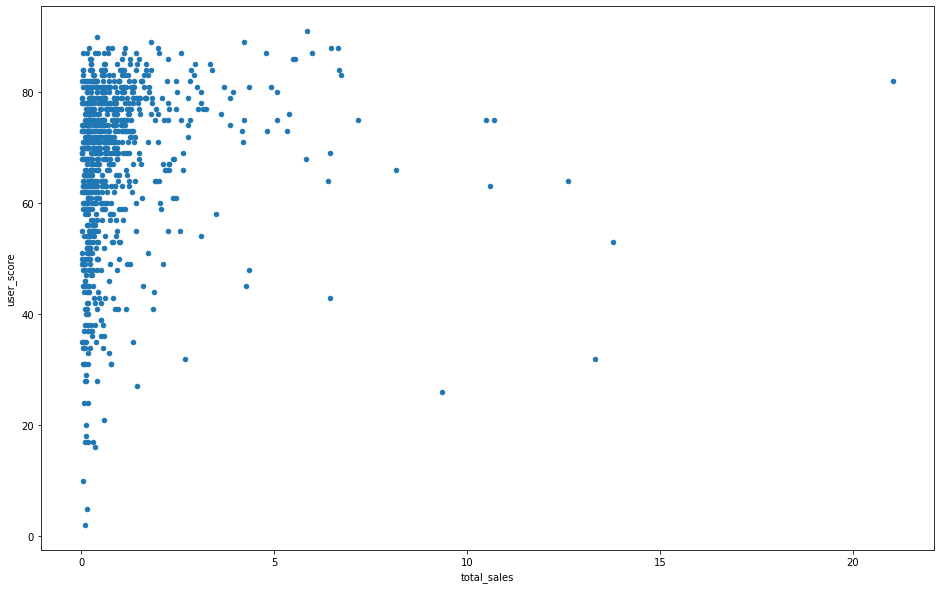

,total_sales,user_score
total_sales,1.000000,0.128416
user_score,0.128416,1.000000


In [64]:
cde8=fd[(fd.platform=='PS3')&(fd['user_score'].notna())][['total_sales', 'user_score']]
cde8.plot(x='total_sales', y='user_score', kind='scatter', figsize=(16,10))
plt.show()
cde8.corr()

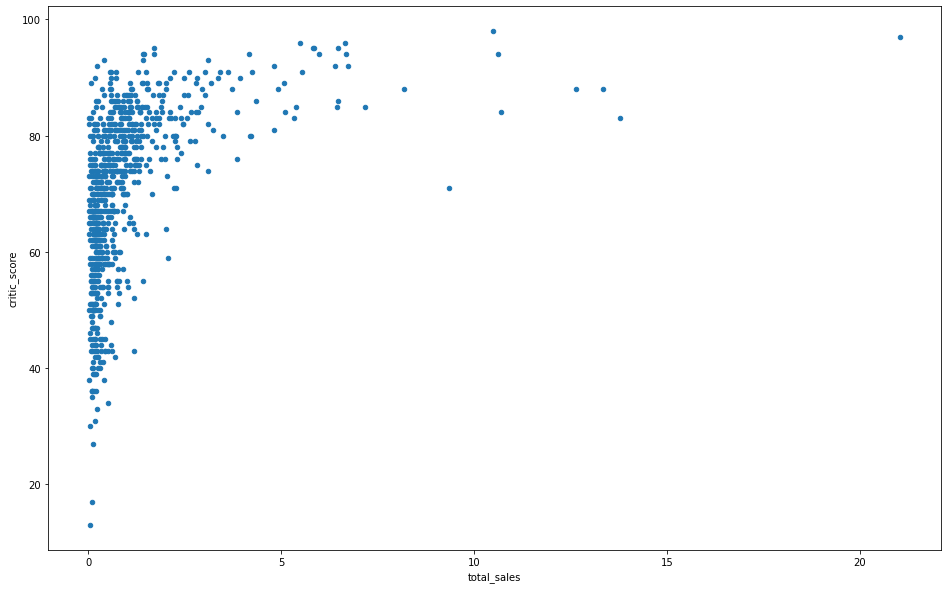

,total_sales,critic_score
total_sales,1.000000,0.432759
critic_score,0.432759,1.000000


In [65]:
cde9=fd[(fd.platform=='PS3')&(fd['critic_score'].notna())][['total_sales', 'critic_score']]
cde9.plot(x='total_sales', y='critic_score', kind='scatter', figsize=(16,10))
plt.show()
cde9.corr()

ps3 is like all other platforms, users score dosent effect sales and critic score more eefects sales but in a low corralation.
we see from this analyze that the scoring of a game dosent really effect the sales and if we want to consider the scoring we sould take in mind the critics score and we can ignore the users score

##genre effect on sales##

now are next step is to check if genres of games effect on the the sales. what do pepole love to play? sports? role playing? lets go and check it

In [66]:
gsfd = fd.pivot_table(index='genre', values='total_sales', aggfunc=('sum','count', 'mean', 'median', 'min', 'max')).sort_values(by='sum', ascending=False).reset_index()
gsfd

,genre,count,max,mean,median,min,sum
0,Action,1548,21.05,0.561105,0.200,0.01,868.59
1,Shooter,513,14.73,1.274074,0.450,0.01,653.60
2,Sports,818,82.54,0.797286,0.260,0.00,652.18
3,Misc,656,28.91,0.594588,0.190,0.01,390.05
4,Role-Playing,471,14.60,0.631699,0.200,0.01,297.53
5,Racing,345,35.52,0.703623,0.230,0.01,242.75
6,Platform,189,28.32,1.030265,0.300,0.01,194.72
7,Fighting,242,12.84,0.588182,0.290,0.01,142.34
8,Simulation,194,9.17,0.458247,0.195,0.01,88.90
9,Adventure,377,5.55,0.192918,0.050,0.01,72.73


we made a table with investigating each genre by the number of games it has and the total sales it has. now visual it and try to get any studdy about it

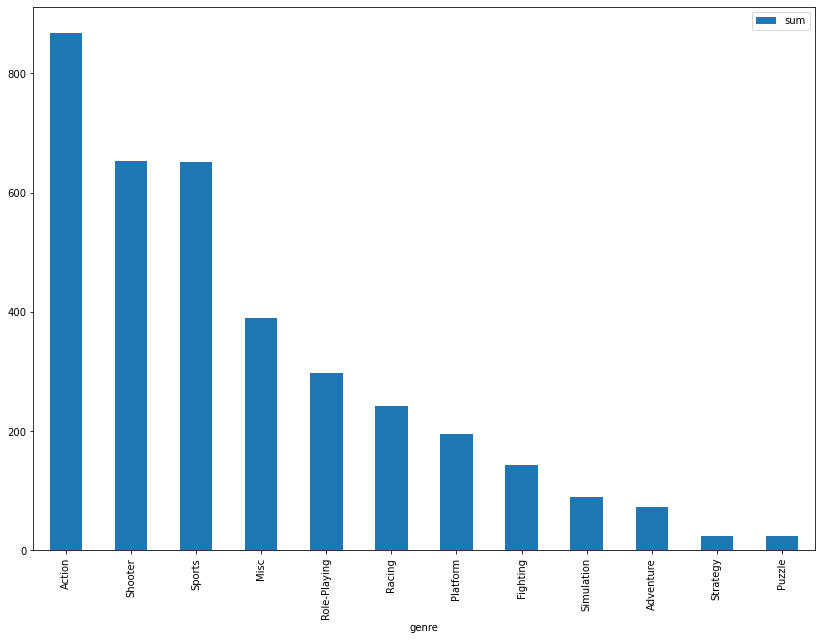

In [67]:
gsfd.plot(x='genre', y='sum', kind='bar', figsize=(14,10))
plt.show()

for the sum of total sales that means the profit for each genre we see that there is one that is heading up over all and that is the action games, after that there are 2 popular genres- shooter and sports so if we want to invest by genres this 3 are the best salers.

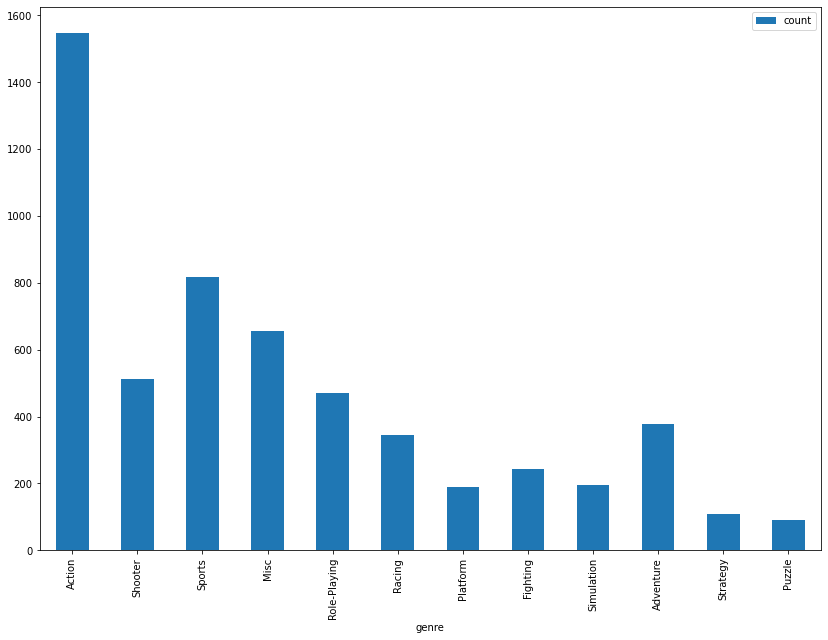

In [68]:
gsfd.plot(x='genre', y='count', kind='bar', figsize=(14,10))
plt.show()

by checking the number of games in each genre we see the action games is the king of all genres in big time. we will not want to invest on puzzles and strategy because they dont sale and dont have a big variance of games

that looks nice but the bar chart is not a full informative chart so we will try to show the mean and median by box plots 

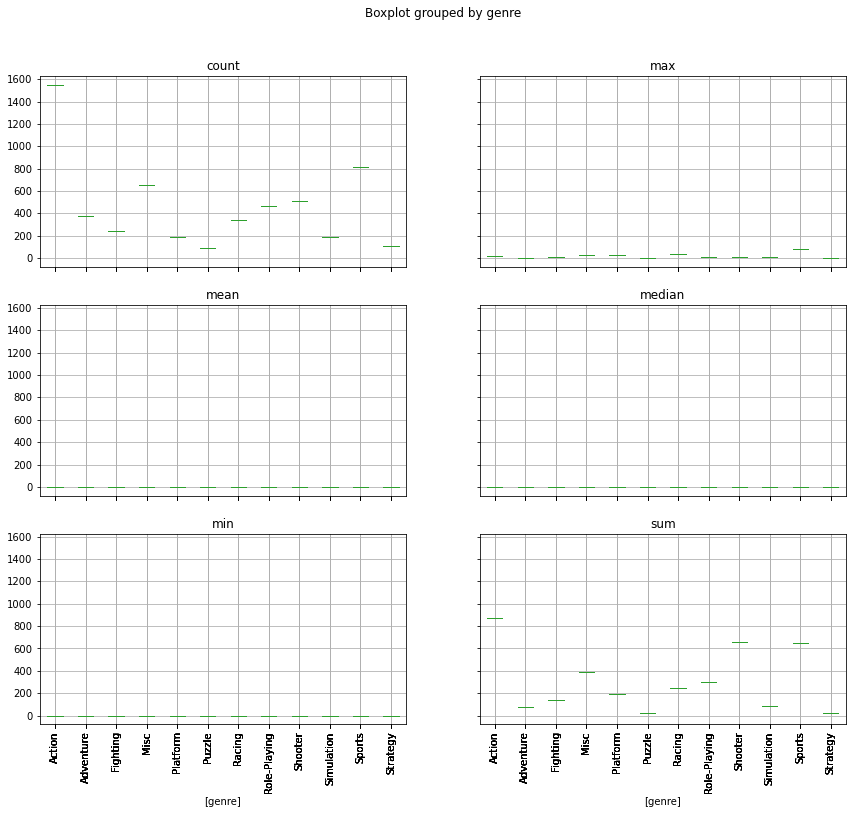

In [69]:
gsfd.boxplot(by='genre', return_type='both', figsize=(14,12), rot=90)
plt.show()

from the box plot we see the mean and median for every genre but it is less understood then scatter so lets plot a scatter

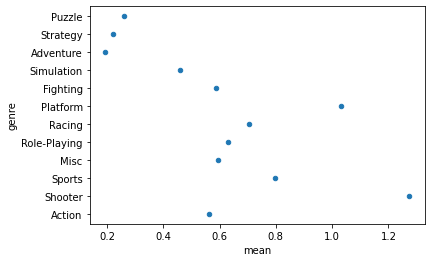

In [70]:
gsfd.plot(y='genre', x='mean', kind='scatter')
plt.show()

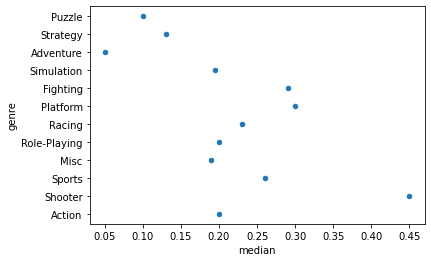

In [71]:
gsfd.plot(y='genre', x='median', kind='scatter')
plt.show()

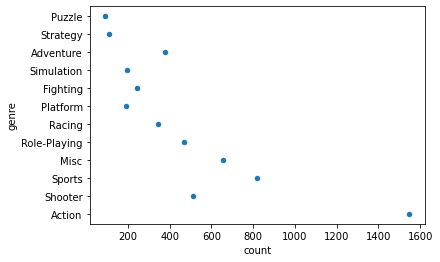

In [72]:
gsfd.plot(y='genre', x='count', kind='scatter')
plt.show()

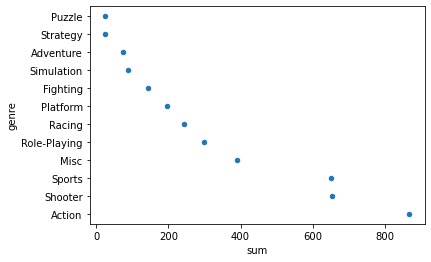

In [73]:
gsfd.plot(y='genre', x='sum', kind='scatter')
plt.show()

the scatters teach us that the mean and median sales are more to the middle but the mean amedian for the 3 top genres are most higer than other and there are close to data on the bar chart

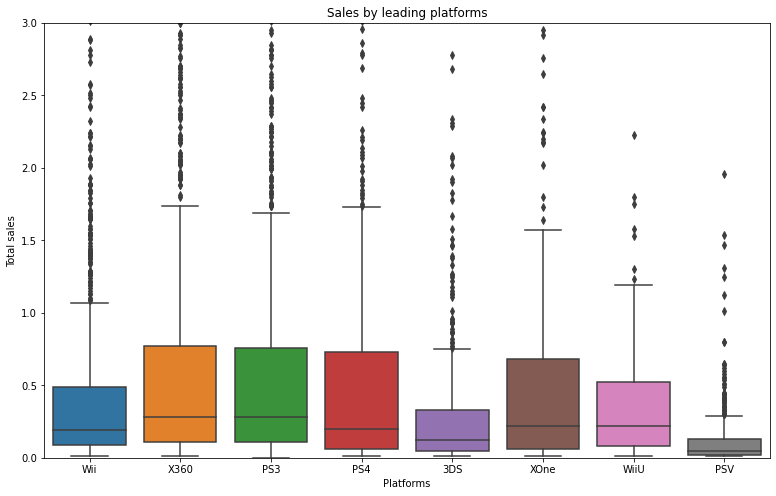

In [74]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = fd, y = 'total_sales', x='platform')
    .set(title = 'Sales by leading platforms', xlabel = 'Platforms', ylabel = 'Total sales', ylim=(0, 3)))

plt.show()

In [75]:
gpd=fd.pivot_table(index='platform', columns='genre', values='name', aggfunc=('count')).reset_index()
gpd

genre,platform,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,3DS,187.0,37.0,14.0,54.0,28.0,20.0,10.0,87.0,6.0,29.0,25.0,15.0
1,PS3,373.0,72.0,76.0,122.0,36.0,2.0,90.0,117.0,155.0,30.0,211.0,22.0
2,PS4,144.0,28.0,18.0,20.0,12.0,1.0,19.0,51.0,41.0,6.0,46.0,6.0
3,PSV,149.0,93.0,16.0,24.0,9.0,3.0,11.0,85.0,5.0,4.0,23.0,7.0
4,Wii,229.0,82.0,41.0,272.0,57.0,54.0,91.0,35.0,61.0,84.0,255.0,25.0
5,WiiU,64.0,3.0,5.0,22.0,17.0,4.0,3.0,7.0,10.0,1.0,8.0,3.0
6,X360,317.0,48.0,65.0,123.0,25.0,6.0,101.0,75.0,197.0,36.0,212.0,27.0
7,XOne,85.0,14.0,7.0,19.0,5.0,NaN,20.0,14.0,38.0,4.0,38.0,3.0


on this table we can see for every platform how many games by genres were on market

# step 4- user profile by region#

next step we will take is to check for every region what are the most popular platforms and genres and does rating effect sales

In [76]:
naps=fd.pivot_table(index='platform', values='na_sales', aggfunc=('sum','count','mean')).sort_values(by='sum', ascending=False)
naps

,count,mean,sum
platform,,,
X360,1232,0.483555,595.74
Wii,1286,0.378593,486.87
PS3,1306,0.298721,390.13
PS4,392,0.277398,108.74
XOne,247,0.377004,93.12
3DS,512,0.161426,82.65
WiiU,147,0.259184,38.10
PSV,429,0.029068,12.47


the northen american most popular platforms are- x360, ps4,wii,ps3 and pc. it is almost equal to the global most saling platforms

In [77]:
nags=fd.pivot_table(index='genre', values='na_sales', aggfunc=('sum','count','mean')).sort_values(by='sum', ascending=False)
nags

,count,mean,sum
genre,,,
Action,1548,0.265381,410.81
Shooter,513,0.675283,346.42
Sports,818,0.412200,337.18
Misc,656,0.330305,216.68
Role-Playing,471,0.260297,122.60
Racing,345,0.304261,104.97
Platform,189,0.494974,93.55
Fighting,242,0.311281,75.33
Simulation,194,0.223351,43.33


here we see na popular genre when on top are- action, sports, shooter, role-playing and misc. this list also looks like the global sales list

In [78]:
nars=fd.pivot_table(index='rating', values='na_sales', aggfunc=('sum','count','mean')).sort_values(by='sum', ascending=False)
nars

,count,mean,sum
rating,,,
E,1190,0.455672,542.25
M,787,0.676976,532.78
T,1130,0.288018,325.46
E10+,752,0.303444,228.19
EC,2,0.310000,0.62


the na population that plays  games are probaly mostly teenages and yooth since the sales by rating is mostly e and t meaning everyone and teenage but threr is a not so small rating gruop sales of m that means 17+

In [79]:
jpps=fd.pivot_table(index='platform', values='jp_sales', aggfunc=('sum','count','mean')).sort_values(by='sum', ascending=False)
jpps

,count,mean,sum
platform,,,
3DS,512,0.196523,100.62
PS3,1306,0.060804,79.41
Wii,1286,0.053095,68.28
PSV,429,0.050909,21.84
PS4,392,0.040714,15.96
WiiU,147,0.088503,13.01
X360,1232,0.009984,12.30
XOne,247,0.001377,0.34


the japaneese market is a beat diffrent from na.we see there 5 most popular platforms are -wii,ps3,psv,ps4 and 3ds that looks a beat like the na best platforms and they seem to love play station (or it's local sony indestry)

In [80]:
jpgs=fd.pivot_table(index='genre', values='jp_sales', aggfunc=('sum','count','mean')).sort_values(by='sum', ascending=False)
jpgs

,count,mean,sum
genre,,,
Role-Playing,471,0.168195,79.22
Action,1548,0.047171,73.02
Sports,818,0.038081,31.15
Misc,656,0.040030,26.26
Platform,189,0.119471,22.58
Shooter,513,0.033957,17.42
Fighting,242,0.069669,16.86
Simulation,194,0.074794,14.51
Racing,345,0.035710,12.32


the japaneese genres favorites are not so diffrent from the na and global. they prefore - role-playing, action, sports, platform and misc. action and sport are popular in america and in asia

In [81]:
jprs=fd.pivot_table(index='rating', values='jp_sales', aggfunc=('sum','count','mean')).sort_values(by='sum', ascending=False)
jprs

,count,mean,sum
rating,,,
E,1190,0.066294,78.89
T,1130,0.047265,53.41
M,787,0.050521,39.76
E10+,752,0.018059,13.58
EC,2,0.000000,0.00


tha rating sales in japan are  again e t and m but here we see the ratio is closer then in the na. the yooth in japan likes to play games more then adults 

In [82]:
eups=fd.pivot_table(index='platform', values='eu_sales', aggfunc=('sum','count','mean')).sort_values(by='sum', ascending=False)
eups

,count,mean,sum
platform,,,
PS3,1306,0.250544,327.21
X360,1232,0.217792,268.32
Wii,1286,0.200871,258.32
PS4,392,0.359923,141.09
3DS,512,0.119668,61.27
XOne,247,0.208866,51.59
WiiU,147,0.170952,25.13
PSV,429,0.030466,13.07


europes most saling platforms are ps4,pc ps3, wii and x360

In [83]:
eugs=fd.pivot_table(index='genre', values='eu_sales', aggfunc=('sum','count','mean')).sort_values(by='sum', ascending=False)
eugs

,count,mean,sum
genre,,,
Action,1548,0.184541,285.67
Sports,818,0.263105,215.22
Shooter,513,0.415731,213.27
Misc,656,0.169101,110.93
Racing,345,0.281101,96.98
Role-Playing,471,0.149766,70.54
Platform,189,0.317989,60.10
Fighting,242,0.146488,35.45
Simulation,194,0.123763,24.01


the euorpian best generes are- action, sports, shooter, racing and misc. the eu prefers like the rest of the world but thet dont like role playing. intresting why?

In [84]:
eurs=fd.pivot_table(index='rating', values='eu_sales', aggfunc=('sum','count','mean')).sort_values(by='sum', ascending=False)
eurs

,count,mean,sum
rating,,,
M,787,0.442490,348.24
E,1190,0.287084,341.63
T,1130,0.153929,173.94
E10+,752,0.170080,127.90
EC,2,0.000000,0.00


europe rating sales is smaller the in na but the ratio is close. more e or children buy games then m or t

now let us visiual our data

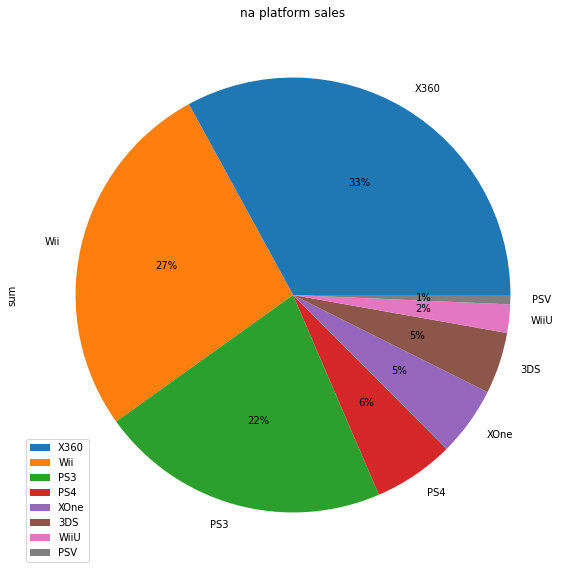

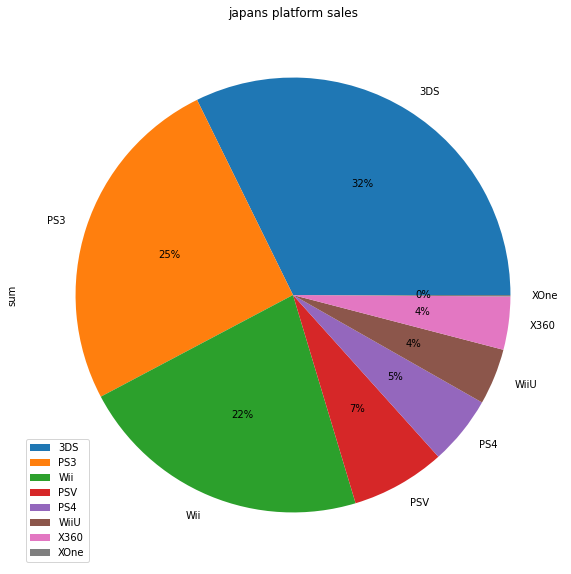

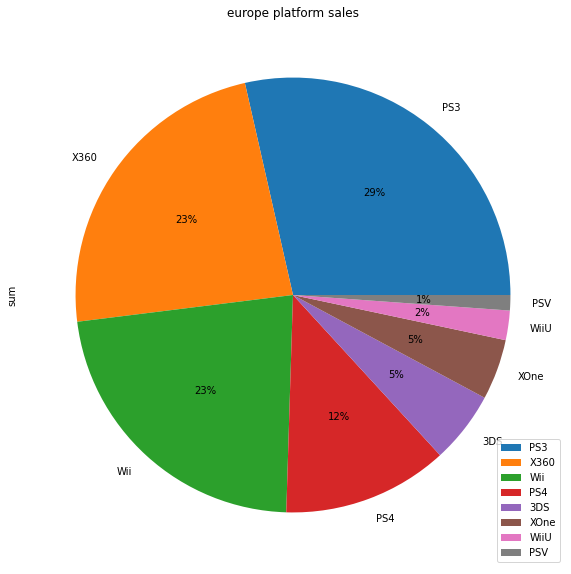

In [85]:
naps.plot(y='sum', kind='pie', figsize=(10,10), title='na platform sales',autopct='%1.0f%%')
jpps.plot(y='sum', kind='pie', figsize=(10,10), title='japans platform sales',autopct='%1.0f%%')
eups.plot(y='sum', kind='pie', figsize=(10,10), title='europe platform sales',autopct='%1.0f%%')

plt.show()

we can see that in every region there are 3 big master platforms and all the rest are a lot smaller. the wii platform is not the biggest in any region but in all region it is in the top 3

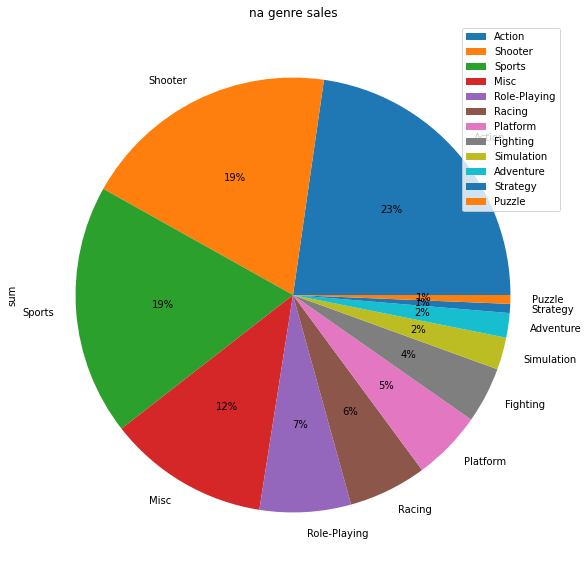

In [86]:
nags.plot(y='sum', kind='pie', figsize=(10,10), title='na genre sales',autopct='%1.0f%%')
plt.show()

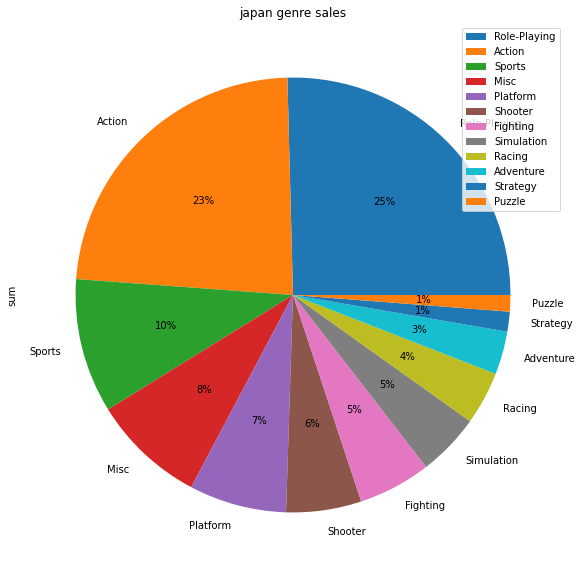

In [87]:
jpgs.plot(y='sum', kind='pie', figsize=(10,10), title='japan genre sales',autopct='%1.0f%%')
plt.show()

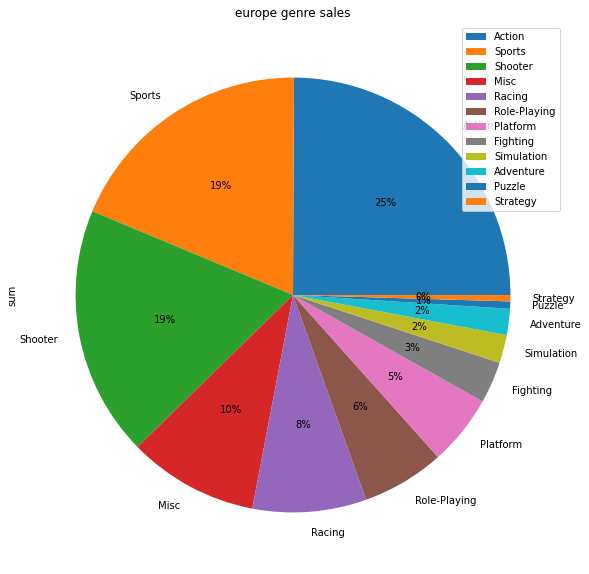

In [88]:
eugs.plot(y='sum', kind='pie', figsize=(10,10), title='europe genre sales',autopct='%1.0f%%')
plt.show()

genre sales are about the same precent of sales all around the world. action and sports are almost half of sales

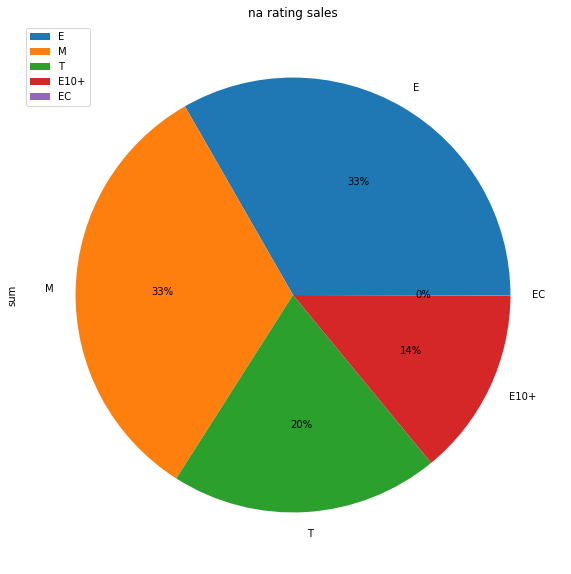

In [89]:
nars.plot(y='sum', kind='pie', figsize=(10,10), title='na rating sales',autopct='%1.0f%%')
plt.show()

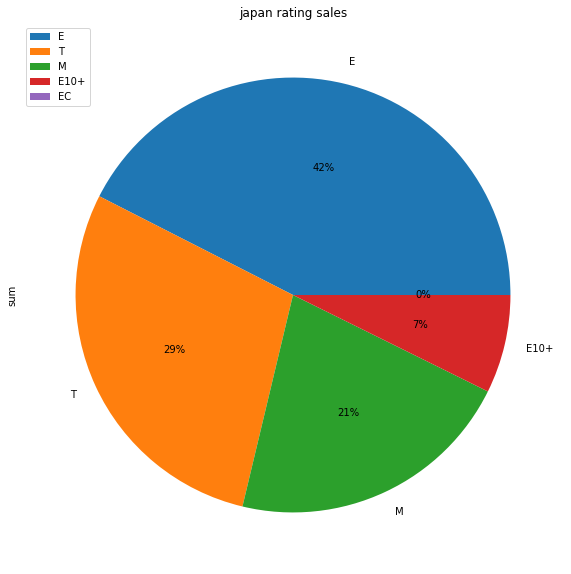

In [90]:
jprs.plot(y='sum', kind='pie', figsize=(10,10), title='japan rating sales',autopct='%1.0f%%')
plt.show()

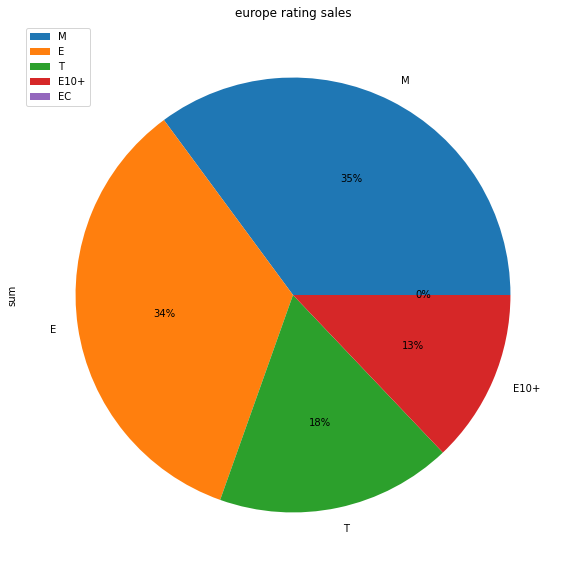

In [91]:
eurs.plot(y='sum', kind='pie', figsize=(10,10), title='europe rating sales',autopct='%1.0f%%')
plt.show()

conclusion- there is a diffrence by regions and if we need to sale games to costumers we need to fit our games to the area we want to sale to or have handy games that will sale in one region (like japan) even if it is less sold in other region that in that region it's wanted and it will be saled.

the rating of e effects saling and  it is the same all over the world. other rating make sales but we dont see an effect 

i changed and fixed what i needed, i hope it's o.k.
the chart names are easy for me to follow because they are acronyms of the data for example eugs is europe genre sales

# step 5- hypothesis#

our next step is to check our hypothesis on ouy studdy

## hypthesis 1- user rating for xbox one and pc are the same## 

our first hypothesis is that the avrage user rating for the xbox on the platform and for pc platform are the same.
H0 means that the avrage rating is the same
H1 is the alternative that means that the avrage rating is diffrent
alpha will be 0.03

let's start from making each platform its scoring and check the mean of scoring for each platform

In [92]:
xones=fd[(fd.platform=='XOne')&(data['user_score'].notna())][['user_score']]
xones

C:\Users\solon\AppData\Local\Temp/ipykernel_18756/1771995755.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xones=fd[(fd.platform=='XOne')&(data['user_score'].notna())][['user_score']]


,user_score
165,79.0
179,54.0
242,64.0
270,62.0
373,41.0
...,...
16544,68.0
16597,60.0
16630,82.0
16643,66.0


In [93]:
xones.mean()

user_score    65.214286
dtype: float64

In [94]:
new_platform=['X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU', 'XOne','PS4','PC']
fd=data[data['year_of_release']>=2012]
fd=data[data['platform'].isin(new_platform)]


adding do the fd table latest data on pc

In [95]:
pcs=fd[(fd.platform=='PC')&(fd['user_score'].notna())][['user_score']]
pcs

,user_score
85,76.0
138,73.0
192,40.0
218,82.0
284,91.0
...,...
16681,81.0
16692,76.0
16696,58.0
16702,72.0


In [96]:
pcs.mean()

user_score    70.659603
dtype: float64

now we will calculate our std for each platform list

In [97]:
xones.std()

user_score    13.809406
dtype: float64

In [98]:
pcs.std()

user_score    15.32718
dtype: float64

C:\Users\solon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\solon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\solon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

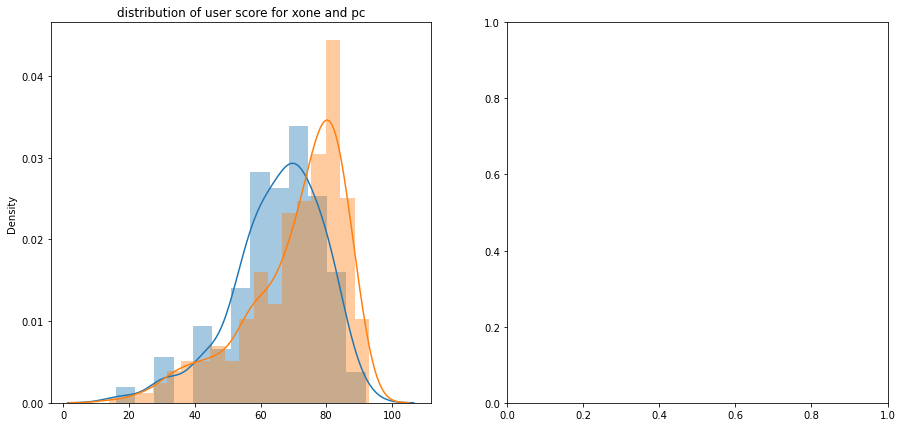

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.distplot(xones, ax=axes[0]).set_title('distribution of user score for xone and pc')
sns.distplot(pcs, ax=axes[0])


sns.boxplot(xones, ax=axes[1])
sns.boxplot(pcs, ax=axes[1])

plt.show()

here we can visual the distribution for both platforms and we can see that thereare not close to eac other

In [100]:
alpha = 0.03 

results = st.ttest_ind(xones['user_score'], pcs['user_score'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  1.3037979620147524e-05
We reject the null hypothesis


from checking our hypothses we reject our hypothses and we see that the avrage scoring of useres on the xone and pc are not the same

##hypothses 2- avrage scoring for genre action and sports##

our next hypothses is that the avrage of users score for action and sport genres are difrent.
H0 will be the answer that there are difrent
H1 will be the alternative that the avrage of user scoring for action and sport genres are the same
alpha will be 0.01 because if it's the same is should be very close to each other


we start with making lists for using in the calculation

In [101]:
ss=data[(data.genre=='Sports')&(data['user_score'].notna())][['user_score']]
ss

,user_score
0,80.0
3,80.0
13,77.0
15,74.0
77,43.0
...,...
16450,45.0
16518,14.0
16528,69.0
16546,95.0


In [102]:
ss.mean()

user_score    69.514339
dtype: float64

there is the mean of the sport scoring

In [103]:
ast=data[(data.genre=='Action')&(data['user_score'].notna())][['user_score']]
ast

,user_score
16,82.0
17,90.0
23,81.0
24,87.0
38,85.0
...,...
16652,85.0
16654,51.0
16660,67.0
16663,24.0


In [104]:
ast.mean()

user_score    70.581292
dtype: float64

and there is the action scoring mean

now lets find the std

In [105]:
ss.std()

user_score    16.195851
dtype: float64

In [106]:
ast.std()

user_score    14.239009
dtype: float64

C:\Users\solon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\solon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\solon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

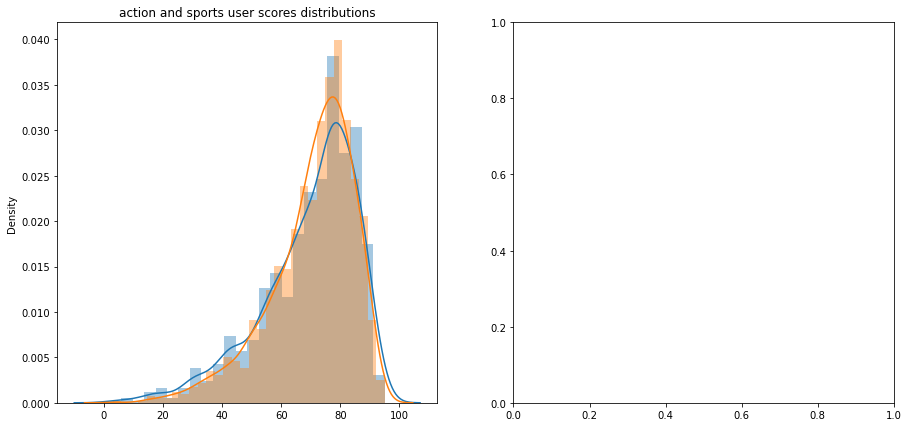

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.distplot(ss, ax=axes[0]).set_title('action and sports user scores distributions')
sns.distplot(ast, ax=axes[0])


sns.boxplot(ss, ax=axes[1])
sns.boxplot(ast, ax=axes[1])

plt.show()

we visual the distribution and see that it looks preaty close

In [108]:
alpha = 0.01

results = st.ttest_ind(ss['user_score'], ast['user_score'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.06480928064420885
We can't reject the null hypothesis


this is a beat surprising but the avrage of action and sport by the users is the same

#general coclusion#

on this porject we analyzed a game online store with diffrent games platforms and regions
##step 1##
we downloaded the data and had a first look
we studdyed the columns types, saw nan's and we were trying to understand whats going on

##step 2##
we changed the data type for year of release.
we decided not to touch the nan's 
we lowerd the columns names
we treated the tbd and changed them to nulls

##step 3##
we analyzed the data checking the distribution
we learned howw many games were released every year
we learned a platforms life cycle
we saw platformes sales
we made a global profile of games, platforms and genres
we checked how scoring of games effects sales

##step 4##
we build a profile of useres in each region

##step 5##
we cecked 2 hypthses 
is the avrage score for platforms are the same
is the avrage scoring fo genres are the same


my conclusion of the work is that going in to next year we need too focus on sales of games that go with the xone and x360, ps3 and wiiu platformes since there are the most popular platformes. we should give attention to action and sport games since there are leading all over the world. if we want to get in more for japan we should have more games of role-playing. the user score is meanningless and the critic score has a little influance only on sales. rating is a filter for sales since children dont buy m rated games but that is not so effected for total sales. 

so for next year we should put our effort for the ps3 and xboxes sport and action games that are raited E.